In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/task

/content/drive/MyDrive/task


In [ ]:
file = open('Chemistry.txt','r',encoding="utf-8")
#file = file.split()
#file

In [ ]:
text = file.read()

In [ ]:
text = text.replace("\n", " ")

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
lower_case = text.lower()

In [ ]:
import string
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

In [ ]:
from nltk.tokenize import word_tokenize
tokenized_words = nltk.tokenize.word_tokenize(cleaned_text,"english")
tokenized_words

['chemistry',
 'grades',
 '12',
 'and',
 '13',
 'teachers',
 '’',
 'guide',
 'implemented',
 'from',
 '2017',
 'department',
 'of',
 'science',
 'faculty',
 'of',
 'science',
 'and',
 'technology',
 'national',
 'institute',
 'of',
 'education',
 'printing',
 'and',
 'distribution',
 '–',
 'educational',
 'publications',
 'department',
 'chemistry',
 'teachers',
 '’',
 'guide',
 'grades',
 '12',
 'and',
 '13',
 '©',
 'national',
 'institute',
 'of',
 'education',
 'first',
 'print',
 '–',
 '2017',
 'reprint',
 '–',
 '2018',
 'department',
 'of',
 'science',
 'faculty',
 'of',
 'science',
 'and',
 'technology',
 'national',
 'institute',
 'of',
 'education',
 'published',
 'by',
 'educational',
 'publications',
 'department',
 'printed',
 'by',
 'print',
 'palace',
 'lanka',
 'colombo',
 'road',
 'horagasmulla',
 'divulapitiya',
 'ii',
 'message',
 'from',
 'the',
 'hon',
 'minister',
 'of',
 'education',
 'in',
 'fulfilling',
 'the',
 'task',
 'of',
 'providing',
 'a',
 'highquality',


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
final_words = []
for word in tokenized_words:
  if word not in stopwords.words('english'):
    final_words.append(word)

final_words

['chemistry',
 'grades',
 '12',
 '13',
 'teachers',
 '’',
 'guide',
 'implemented',
 '2017',
 'department',
 'science',
 'faculty',
 'science',
 'technology',
 'national',
 'institute',
 'education',
 'printing',
 'distribution',
 '–',
 'educational',
 'publications',
 'department',
 'chemistry',
 'teachers',
 '’',
 'guide',
 'grades',
 '12',
 '13',
 '©',
 'national',
 'institute',
 'education',
 'first',
 'print',
 '–',
 '2017',
 'reprint',
 '–',
 '2018',
 'department',
 'science',
 'faculty',
 'science',
 'technology',
 'national',
 'institute',
 'education',
 'published',
 'educational',
 'publications',
 'department',
 'printed',
 'print',
 'palace',
 'lanka',
 'colombo',
 'road',
 'horagasmulla',
 'divulapitiya',
 'ii',
 'message',
 'hon',
 'minister',
 'education',
 'fulfilling',
 'task',
 'providing',
 'highquality',
 'education',
 'children',
 'sri',
 'lanka',
 'main',
 'function',
 'ministry',
 'education',
 'contribution',
 'received',
 'teachers',
 'invaluable',
 'teachers',

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.express as px

#Libraries for preprocessing
from gensim.parsing.preprocessing import remove_stopwords
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

#Download once if using NLTK for preprocessing
import nltk
nltk.download('punkt')

#Libraries for vectorisation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

#Libraries for clustering
from sklearn.cluster import KMeans

def stemSentence(sentence):
    porter = PorterStemmer()
    token_words = word_tokenize(sentence)
    stem_sentence = [porter.stem(word) for word in token_words]
    return ' '.join(stem_sentence)

text3 = pd.Series([stemSentence(x) for x in final_words])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
text3

0        chemistri
1            grade
2               12
3               13
4          teacher
           ...    
14435      product
14436     na2co3bi
14437       solvay
14438      process
14439           91
Length: 14440, dtype: object

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [ ]:
from scipy.sparse.construct import random
final_words = make_blobs(n_samples=1000,
                         centers = 4,
                         n_features=2,
                         cluster_std=1.6,
                         random_state=50)

final_words

(array([[-3.79739466,  5.9847967 ],
        [-4.22148073, -0.9294158 ],
        [-0.37768636, -5.7517762 ],
        ...,
        [ 1.27189968,  6.85503218],
        [-5.26332299, -4.74635568],
        [-0.08913989,  3.47695943]]),
 array([2, 1, 0, 3, 3, 3, 3, 0, 2, 0, 2, 0, 0, 0, 2, 3, 0, 1, 2, 2, 2, 3,
        2, 3, 0, 2, 3, 1, 1, 0, 2, 3, 0, 0, 0, 3, 3, 0, 3, 0, 3, 1, 1, 0,
        2, 3, 1, 1, 0, 3, 1, 2, 2, 2, 0, 2, 2, 1, 1, 0, 3, 3, 0, 3, 1, 2,
        1, 0, 2, 0, 1, 2, 1, 2, 3, 3, 0, 2, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0,
        2, 0, 2, 2, 0, 1, 3, 0, 2, 3, 1, 3, 1, 3, 1, 2, 1, 1, 2, 3, 0, 1,
        2, 2, 0, 2, 2, 2, 2, 1, 3, 3, 2, 3, 2, 3, 0, 1, 1, 3, 0, 0, 3, 3,
        0, 1, 1, 3, 2, 0, 2, 2, 1, 0, 1, 0, 0, 2, 0, 3, 1, 3, 1, 0, 0, 0,
        0, 1, 2, 3, 1, 0, 0, 0, 1, 1, 3, 3, 0, 2, 1, 1, 2, 1, 1, 2, 1, 3,
        1, 2, 0, 3, 2, 3, 3, 0, 3, 3, 3, 1, 1, 1, 1, 0, 0, 2, 2, 3, 3, 2,
        3, 2, 0, 2, 3, 1, 0, 1, 1, 3, 1, 2, 0, 3, 2, 0, 3, 0, 3, 1, 0, 1,
        1, 2, 3, 0, 1, 1, 3, 

In [ ]:
points = final_words[0]

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans =KMeans(n_clusters=4)

In [ ]:
kmeans.fit(points)

KMeans(n_clusters=4)

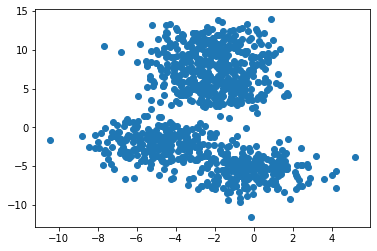

In [ ]:
plt.scatter(final_words[0][:,0],final_words[0][:,1])

In [ ]:
clusters = kmeans.cluster_centers_

In [ ]:
print(clusters)

[[-0.16018559 -5.57773792]
 [-1.98150593  5.34243461]
 [-4.9151789  -2.02967467]
 [-2.26199582 10.00641402]]


In [ ]:
y_km = kmeans.fit_predict(points)

<function matplotlib.pyplot.show>

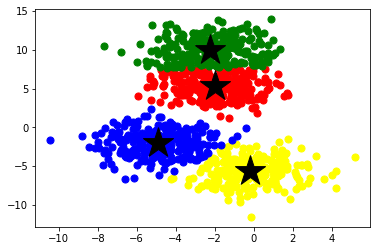

In [ ]:
plt.scatter(points[y_km == 0,0] , points[y_km == 0,1] , s = 50 , color = 'red')
plt.scatter(points[y_km == 1,0] , points[y_km == 1,1] , s = 50 , color = 'yellow')
plt.scatter(points[y_km == 2,0] , points[y_km == 2,1] , s = 50 , color = 'blue')
plt.scatter(points[y_km == 3,0] , points[y_km == 3,1] , s = 50 , color = 'green')
plt.scatter(clusters[0][0] , clusters[0][1], marker='*' , s = 1000 , color = 'black')
plt.scatter(clusters[1][0] , clusters[1][1], marker='*' , s = 1000 , color = 'black')
plt.scatter(clusters[2][0] , clusters[2][1], marker='*' , s = 1000 , color = 'black')
plt.scatter(clusters[3][0] , clusters[3][1], marker='*' , s = 1000 , color = 'black')
plt.show